## Kaggle Project #1 - Bike Sharing Demand 

- Source: https://www.kaggle.com/c/bike-sharing-demand

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Dataset
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### Evaluation metrics
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

- n  is the number of hours in the test set
- pi is your predicted count
- ai is the actual count
- log(x) is the natural logarithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("train.csv", parse_dates=["datetime"])

In [3]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [4]:
all_df.tail()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [5]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [6]:
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

#### Evaluation metrics
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$


In [7]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [8]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [9]:
submission_df = pd.read_csv("sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
rmsle(submission_df["count"].values, 
      np.random.randint(0, 100, size=len(submission_df)))

3.761229205994751

In [11]:
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [12]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [13]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


In [14]:
pre_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [16]:
pre_df= pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [17]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [18]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [19]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [20]:
train_df = pre_df.iloc[train_index]
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,...,1,4,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336.0,...,19,19,2,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241.0,...,19,20,2,0,0,1,0,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168.0,...,19,21,2,0,0,1,0,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129.0,...,19,22,2,0,0,1,0,0,0,0


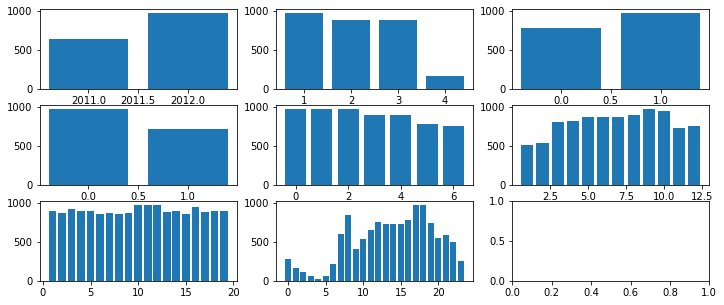

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [22]:
series_data = train_df.groupby(["month"])["count"].mean()
series_data

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [23]:
series_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

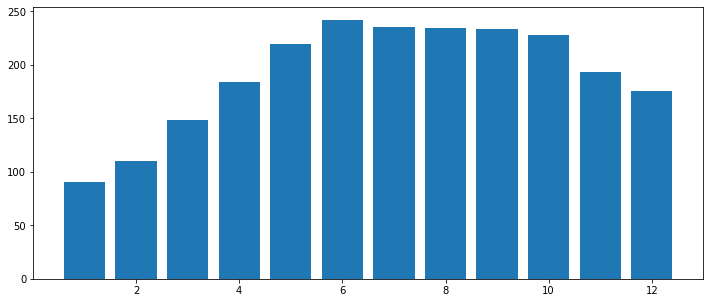

In [24]:
fig, ax = plt.subplots()
ax.bar(range(1, len(series_data)+1), series_data)
fig.set_size_inches(12,5)
plt.show()

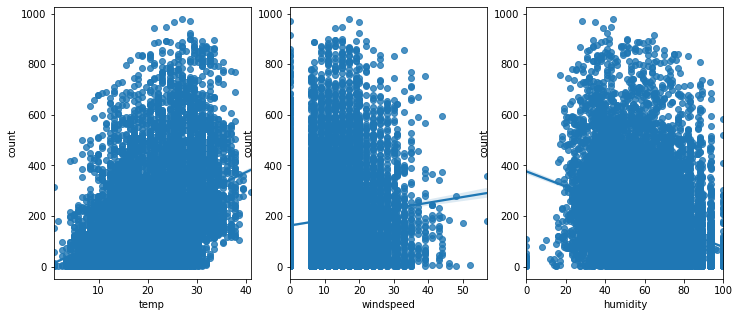

In [25]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()

In [26]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

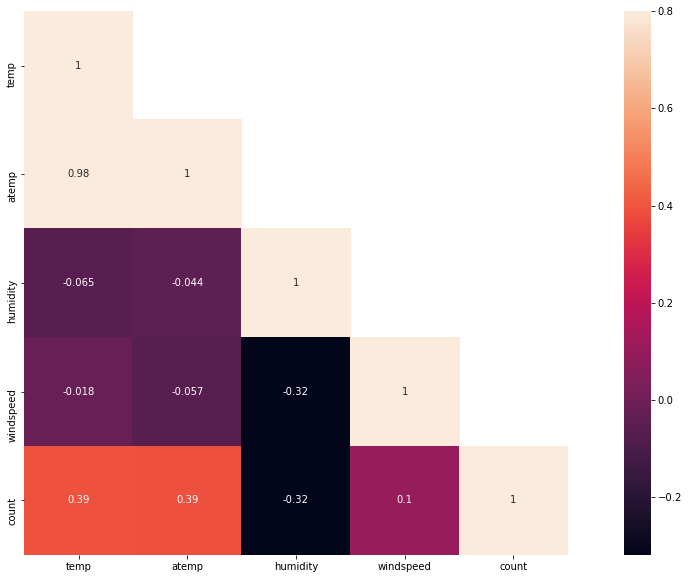

In [27]:
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [28]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [29]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

In [30]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [31]:
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [32]:
all_variable_list = continuous_variable_list + category_varialbe_list



In [33]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)


In [34]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [35]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [36]:
varaible_combinations = []
import itertools
for L in range(13, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        varaible_combinations.append(temp)

In [37]:
len(varaible_combinations)

121

In [38]:
del pre_df["count"]

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf= KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(varaible_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(varaible_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()
        


121


<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

0 0:00:00.982407


<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

100 0:00:59.511995


<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f0690054>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-8-5911f06

In [40]:
labels = ["combination", "lr","ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.323862,1.323639,1.306853
1,1,1.341392,1.318342,1.307863
2,2,1.322309,1.321924,1.310925
3,3,1.461014,1.460332,1.436101
4,4,1.465278,1.465935,1.441929


In [41]:
result_df.min()

combination    0.000000
lr             1.303632
ridge          1.303447
lasso          1.292406
dtype: float64

In [42]:
result_df["lasso"].sort_values().head()

8      1.292406
14     1.298411
102    1.300448
66     1.302723
68     1.302774
Name: lasso, dtype: float64

In [43]:
varaible_combinations[8]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [44]:
target_df = pre_df[varaible_combinations[8]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 22)

In [45]:
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [46]:
models[8][2]

Lasso()

In [47]:
final_result = models[8][2].predict(X_submission_test)
final_result[final_result < 0] = 0

In [48]:
final_result

array([ 13.52940802,  22.22512722,  29.58033602, ..., 195.31192991,
       212.73625388, 201.89205469])

In [49]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [50]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.529408
10887,2011-01-20 01:00:00,22.225127
10888,2011-01-20 02:00:00,29.580336
10889,2011-01-20 03:00:00,37.033077
10890,2011-01-20 04:00:00,44.388286


In [51]:
df_submission.set_index("datetime").to_csv("submission_lasso_data.csv")